<a href="https://colab.research.google.com/github/ykitaguchi77/Colab_Scripts/blob/master/RandomForest_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RandomForestClassifier**

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


def get_iris(target_name=False):
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['Species'] = iris.target
    if target_name:
        df.Species = df.Species.apply(lambda x:'setosa' if x == 1 else 'versicolor' if x == 2 else 'virginica')

    return df

def plot_pairplot(df):
    g = sns.pairplot(df, hue='Species', plot_kws={'alpha': 0.5}, palette='rainbow_r')

    plt.show() 

def get_train_test_split(df):
    X = df.drop('Species', axis=1)
    y = df.Species
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    return X_train, X_test, y_train, y_test

def get_accuracy(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    print('予測値：', pred)
    print('実測値：', np.array(y_test))
    print('精度：', accuracy_score(pred, y_test))



'\nif __name__ == "__main__":\n    # ペアプロットを出力\n    df = get_iris(target_name=True)\n    plot_pairplot(df)\n\n    # ランダムフォレストの実装\n    df = get_iris()\n    X_train, X_test, y_train, y_test = get_train_test_split(df)\n    get_accuracy(X_train, X_test, y_train, y_test)\n'

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)     Species
0                  5.1               3.5  ...               0.2   virginica
1                  4.9               3.0  ...               0.2   virginica
2                  4.7               3.2  ...               0.2   virginica
3                  4.6               3.1  ...               0.2   virginica
4                  5.0               3.6  ...               0.2   virginica
..                 ...               ...  ...               ...         ...
145                6.7               3.0  ...               2.3  versicolor
146                6.3               2.5  ...               1.9  versicolor
147                6.5               3.0  ...               2.0  versicolor
148                6.2               3.4  ...               2.3  versicolor
149                5.9               3.0  ...               1.8  versicolor

[150 rows x 5 columns]


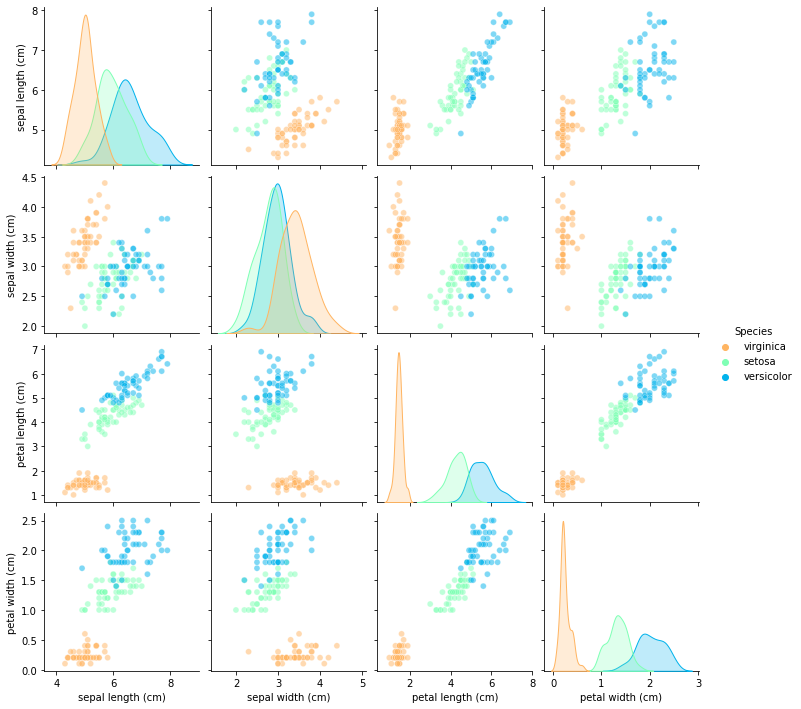

予測値： [2 1 0 2 0 1 1 2 0 1 0 1 2 2 2 2 0 1 0 2 2 1 0 1 1 0 2 1 2 0]
実測値： [2 1 0 2 0 1 1 2 0 1 0 1 2 2 2 2 0 1 0 2 2 1 0 1 1 0 2 1 2 0]
精度： 1.0


In [4]:
# ペアプロットを出力
df = get_iris(target_name=True)
print(df)
plot_pairplot(df)

# ランダムフォレストの実装
df = get_iris()
X_train, X_test, y_train, y_test = get_train_test_split(df)
get_accuracy(X_train, X_test, y_train, y_test)

#**RandomForestRegressor**
https://hinomaruc.hatenablog.com/entry/2019/11/13/235327

In [33]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

#import data
df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep="\t")
print(list(df.columns))


# 訓練データとテストデータに分割する。
# 本当は町ごとにサンプリングした方がいいと思うが、TODOにしておく。
from sklearn.model_selection import train_test_split
# TODO:層別サンプリング train, test = train_test_split(df, test_size=0.20, stratify=df["町区分"], random_state=100)
train, test = train_test_split(df, test_size=0.20,random_state=100)

# 変数の組み合わせは前回の重回帰分析と同じ
X_train = train[["RM","LSTAT","PTRATIO","B"]]
Y_train = train["CMEDV"]
X_test = test[["RM","LSTAT","PTRATIO","B"]]
Y_test = test["CMEDV"]


#Create model
import numpy as np
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train) 


#　　精度確認
# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

get_model_evaluations(X_train,Y_train,X_test,Y_test,model)



['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


('adjusted_r2(train)     :0.9699130376171284',
 'adjusted_r2(test)      :0.8111299380244453',
 '平均誤差率(test)       :0.14569204973193473',
 'MAE(test)              :2.8734215686274487',
 'MedianAE(test)         :2.1865000000000068',
 'RMSE(test)             :4.183559481036758',
 'RMSE(test) / MAE(test) :1.4559504691945095')

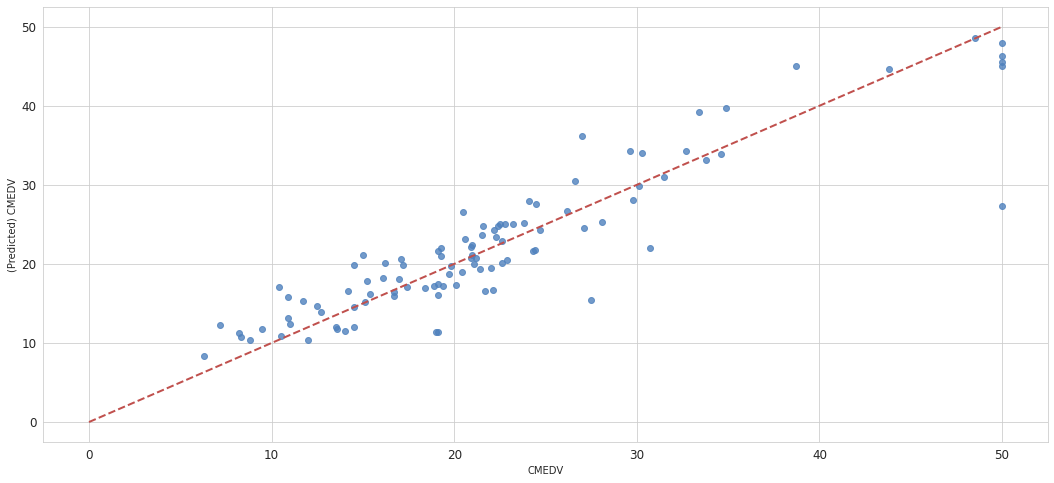

In [7]:
# 描画設定
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12       # x軸のラベルのフォントサイズ
rcParams['ytick.labelsize'] = 12       # y軸のラベルのフォントサイズ
rcParams['figure.figsize'] = 18,8      # 画像サイズの変更(inch)

import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
sns.set_color_codes()                  # デフォルトカラー設定 (deepになってる)

plt.figure()
ax = sns.regplot(x=Y_test, y=model.predict(X_test), fit_reg=False,color='#4F81BD')
ax.set_xlabel(u"CMEDV")
ax.set_ylabel(u"(Predicted) CMEDV")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.plot([0,10,20,30,40,50],[0,10,20,30,40,50], linewidth=2, color="#C0504D",ls="--")


#**XGBoost　regressor**

In [39]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep="\t")
print(list(df.columns))

# 訓練データとテストデータに分割する。
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=100)


# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

model = GradientBoostingRegressor(random_state=1, n_estimators=10)
model= model.fit(X_train, Y_train)
get_model_evaluations(X_train,Y_train,X_test,Y_test,ereg)

['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


('adjusted_r2(train)     :0.9060361673732533',
 'adjusted_r2(test)      :0.8152194739166603',
 '平均誤差率(test)       :0.1392184041616745',
 'MAE(test)              :2.8826258490829098',
 'MedianAE(test)         :2.251912106515971',
 'RMSE(test)             :4.1380190558357794',
 'RMSE(test) / MAE(test) :1.4355033474608803')

#**XGBoost regressor (grid search)**

In [67]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep="\t")
print(df.columns)

FEATURE_COLS=[
 #'OBS.',
 #'TOWN',
 #'TOWN#',
 #'TRACT',
 #'LON',
 #'LAT',
 #'MEDV',
 #'CMEDV',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']
X_train = train[FEATURE_COLS]
Y_train = train["CMEDV"]
X_test = test[FEATURE_COLS]
Y_test = test["CMEDV"]

Index(['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM',
       'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [68]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import sklearn; 

sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [73]:
# Grid Search用のパラメータ作成。
# あまり組み合わせが多いと時間がかかる(time consuming)
params = {
        'eta': [0.01],             # default = 0.3      
        'gamma': [1,2,3],            # default = 0
        'max_depth': [7,8,9],      # default = 6
        'min_child_weight': [1],   # default = 1
        'subsample': [0.8,1.0],        # default = 1
        'colsample_bytree': [0.8,1.0], # default = 1
        }
kf = KFold(n_splits=5, shuffle = True, random_state = 1)

#最適解探索
model = xgb.XGBRegressor(objective ='reg:squarederror')
grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=2, cv=kf.split(X_train,Y_train), verbose=3)


grid.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:   12.2s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f6c694fbe50>,
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    object...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'colsample_bytree': [0.8, 1.0], 'eta': [0.01],
            

In [78]:
print('ベストスコア:',grid.best_score_, sep="\n")
print('\n')
print('ベストestimator:',grid.best_estimator_,sep="\n")
print('\n')
print('ベストparams:',grid.best_params_,sep="\n")

print(pd.DataFrame(grid.cv_results_))


ベストスコア:
-9.521597384566473


ベストestimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, eta=0.01, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)


ベストparams:
{'colsample_bytree': 1.0, 'eta': 0.01, 'gamma': 1, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.8}
    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.113887      0.004881  ...        3.338332               13
1        0.109256      0.003071  ...        3.008121               28
2        0.122238      0.003608  ...        3.604727               14
3        0.122113      0.004575  ...        3.091205  

In [79]:
# Grid Searchで一番精度が良かったモデル
bestmodel = grid.best_estimator_

get_model_evaluations(X_train,Y_train,X_test,Y_test,bestmodel)


('adjusted_r2(train)     :0.9979849458983184',
 'adjusted_r2(test)      :0.9007293205261151',
 '平均誤差率(test)       :0.10292127436810407',
 'MAE(test)              :2.0740456263224285',
 'MedianAE(test)         :1.506885433197021',
 'RMSE(test)             :2.8888856581918403',
 'RMSE(test) / MAE(test) :1.3928746897020952')

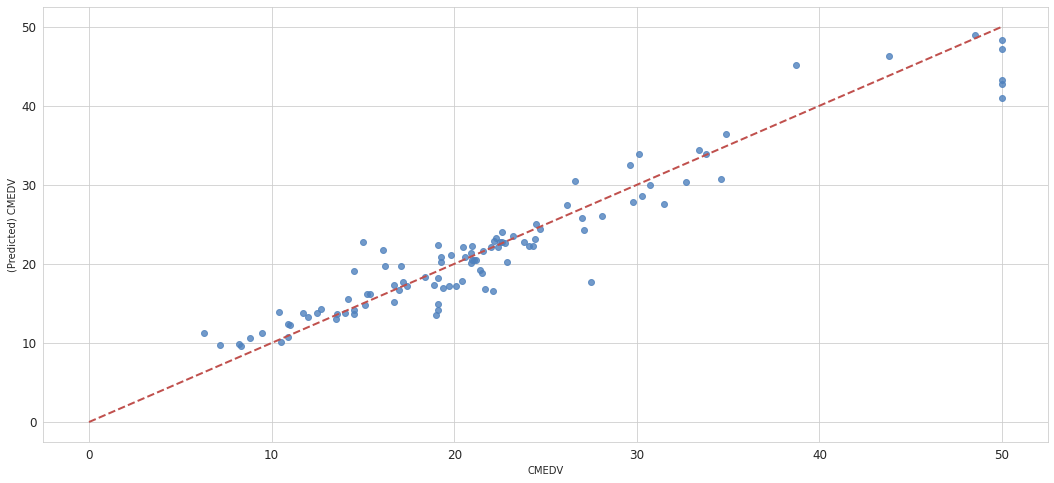

In [80]:
# 描画設定
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12       # x軸のラベルのフォントサイズ
rcParams['ytick.labelsize'] = 12       # y軸のラベルのフォントサイズ
rcParams['figure.figsize'] = 18,8      # 画像サイズの変更(inch)

import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
sns.set_color_codes()                  # デフォルトカラー設定 (deepになってる)

plt.figure()
ax = sns.regplot(x=Y_test, y=bestmodel.predict(X_test), fit_reg=False,color='#4F81BD')
ax.set_xlabel(u"CMEDV")
ax.set_ylabel(u"(Predicted) CMEDV")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.plot([0,10,20,30,40,50],[0,10,20,30,40,50], linewidth=2, color="#C0504D",ls="--")


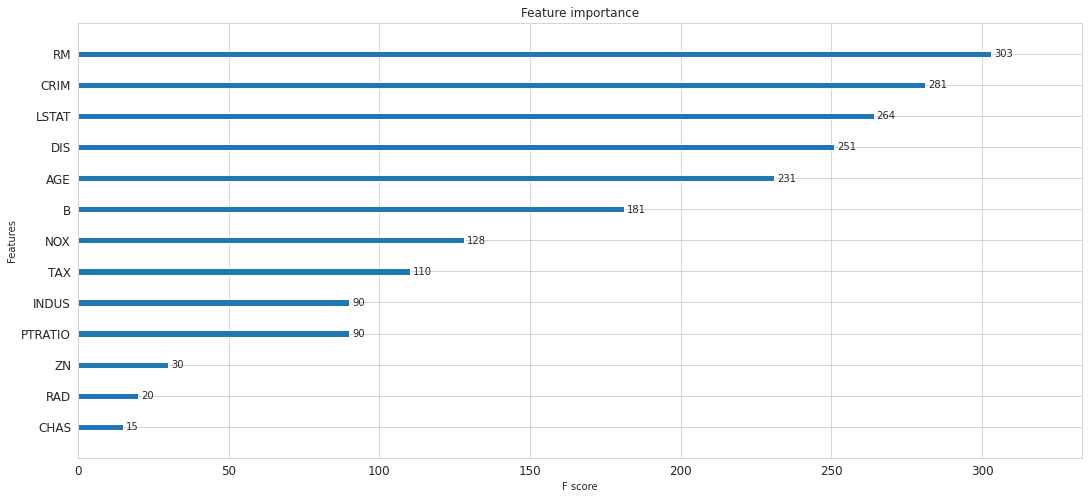

In [81]:
xgb.plot_importance(bestmodel)

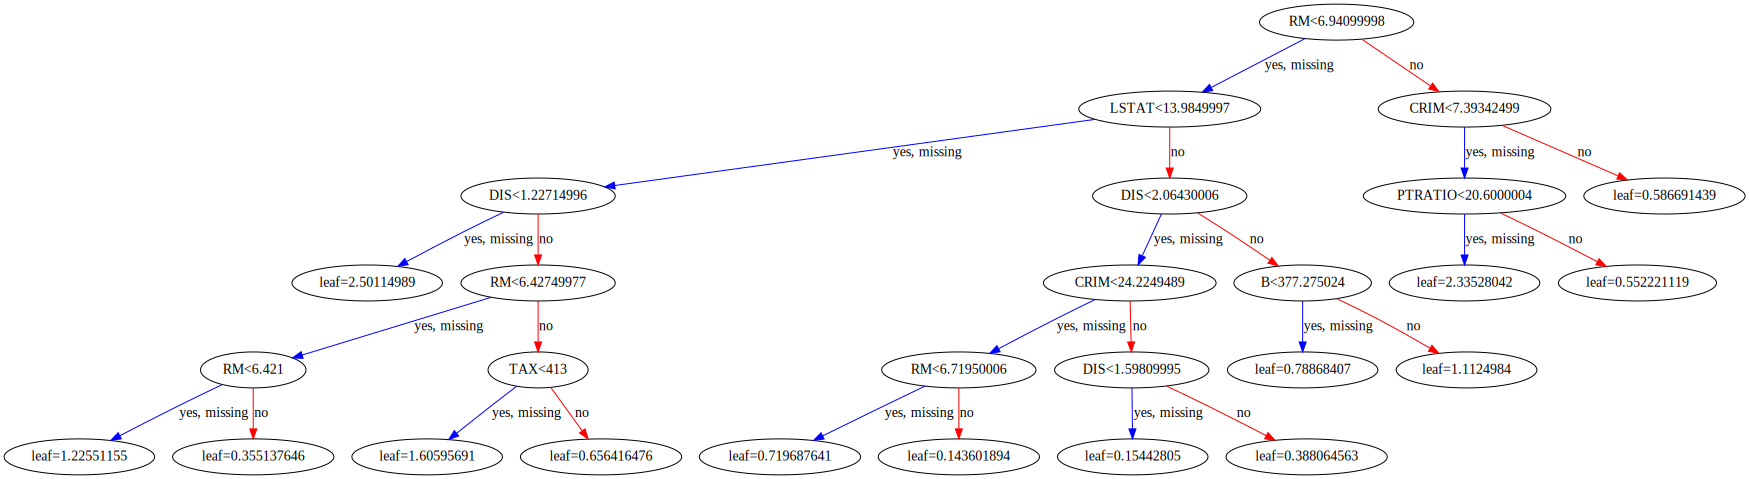

In [82]:
xgb.to_graphviz(bestmodel, num_trees=5)


#**Voting regressor**

In [37]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep="\t")
print(list(df.columns))

# 訓練データとテストデータに分割する。
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=100)


# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

# GradientBoosting, RandomForest, 重回帰で試して見る
# sklearnのサンプルと同じ
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression(normalize=True)
ereg = VotingRegressor(estimators=[('xgb', reg1), ('rf', reg2), ('lr', reg3)])

ereg= ereg.fit(X_train, Y_train)
print(ereg.estimators)

get_model_evaluations(X_train,Y_train,X_test,Y_test,ereg)


['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
[('xgb', GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)), ('rf', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
       

('adjusted_r2(train)     :0.8548861592039549',
 'adjusted_r2(test)      :0.7794138810868475',
 '平均誤差率(test)       :0.14603260686642647',
 'MAE(test)              :3.109038705038925',
 'MedianAE(test)         :2.2944415916860663',
 'RMSE(test)             :4.521197475831905',
 'RMSE(test) / MAE(test) :1.4542107399641717')

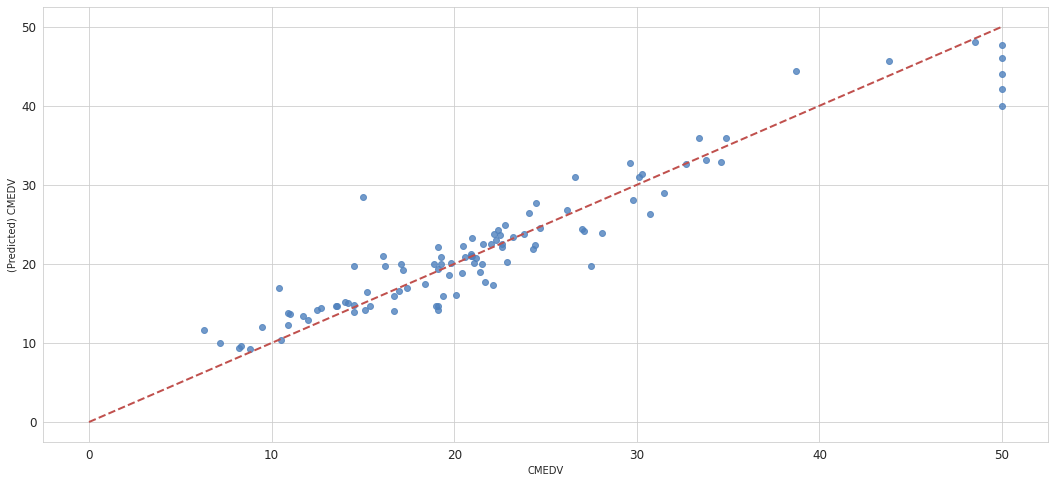

In [10]:
# 描画設定
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12       # x軸のラベルのフォントサイズ
rcParams['ytick.labelsize'] = 12       # y軸のラベルのフォントサイズ
rcParams['figure.figsize'] = 18,8      # 画像サイズの変更(inch)

import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
sns.set_color_codes()                  # デフォルトカラー設定 (deepになってる)

plt.figure()
ax = sns.regplot(x=Y_test, y=model.predict(X_test), fit_reg=False,color='#4F81BD')
ax.set_xlabel(u"CMEDV")
ax.set_ylabel(u"(Predicted) CMEDV")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.plot([0,10,20,30,40,50],[0,10,20,30,40,50], linewidth=2, color="#C0504D",ls="--")

In [38]:
# 組み合わせを変えてvoting regressor
# xgboost, random forest, 重回帰でやってみる

reg1 = xgb.XGBRegressor( objective ='reg:squarederror'
                        , base_score=0.5
                        , booster='gbtree'
                        , colsample_bylevel=1
                        , colsample_bynode=1
                        , colsample_bytree=1
                        , gamma=0
                        , importance_type='gain'
                        , learning_rate=0.1
                        , max_delta_step=0
                        , max_depth=3
                        , min_child_weight=1
                        , missing=None
                        , n_estimators=100
                        , n_jobs=1
                        , nthread=None
                        , random_state=0
                        , reg_alpha=0
                        , reg_lambda=1
                        , scale_pos_weight=1
                        , seed=None
                        , silent=None
                        , subsample=1
                        , verbosity=1)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression(normalize=True)
ereg = VotingRegressor(estimators=[('xgb', reg1), ('rf', reg2), ('lr', reg3)])

ereg = ereg.fit(X_train, Y_train)
get_model_evaluations(X_train,Y_train,X_test,Y_test,ereg)

('adjusted_r2(train)     :0.9060361673732533',
 'adjusted_r2(test)      :0.8152194739166603',
 '平均誤差率(test)       :0.1392184041616745',
 'MAE(test)              :2.8826258490829098',
 'MedianAE(test)         :2.251912106515971',
 'RMSE(test)             :4.1380190558357794',
 'RMSE(test) / MAE(test) :1.4355033474608803')

#**予測数値の平均をとるモデル**

In [40]:
# XgBoost用
X_train = train[FEATURE_COLS]
X_test = test[FEATURE_COLS]

# 変数を絞る (重回帰と多項式回帰用)
X_train2 = train[["RM","LSTAT","PTRATIO","B"]] #部屋数、身分が低い人口割合、生徒と先生比率、人種スコアでの重回帰
X_test2 = test[["RM","LSTAT","PTRATIO","B"]]

# 目的変数(ターゲット)
Y_train = train["CMEDV"] #修正済み住宅価格中央値
Y_test = test["CMEDV"]



# 多項式回帰用にデータセットを変換
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2) # n=2

X_train_poly = poly_features.fit_transform(X_train2)
X_test_poly = poly_features.fit_transform(X_test2)

In [41]:
# 重回帰
import numpy as np
from sklearn.linear_model import LinearRegression
multiple_regression = LinearRegression()
multiple_regression.fit(X_train2,Y_train)


# 多項式回帰
import numpy as np
from sklearn.linear_model import LinearRegression
polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_poly,Y_train)


# XgBoost
import xgboost as xgb
xgboost = xgb.XGBRegressor( objective ='reg:squarederror'
                        , base_score=0.5
                        , booster='gbtree'
                        , colsample_bylevel=1
                        , colsample_bynode=1
                        , colsample_bytree=1
                        , gamma=0
                        , importance_type='gain'
                        , learning_rate=0.1
                        , max_delta_step=0
                        , max_depth=3
                        , min_child_weight=1
                        , missing=None
                        , n_estimators=100
                        , n_jobs=1
                        , nthread=None
                        , random_state=0
                        , reg_alpha=0
                        , reg_lambda=1
                        , scale_pos_weight=1
                        , seed=None
                        , silent=None
                        , subsample=1
                        , verbosity=1)
xgboost.fit(X_train,Y_train) 



#各モデルの予測値の平均を取る (テストデータ)
yhat_test_1 = multiple_regression.predict(X_test2)
yhat_test_2 = polynomial_regression.predict(X_test_poly)
yhat_test_3 = xgboost.predict(X_test)

yhat_test_average = (yhat_test_1 + yhat_test_2 + yhat_test_3) / 3


#各モデルの予測値の平均を取る (訓練データ)
yhat_train_1 = multiple_regression.predict(X_train2)
yhat_train_2 = polynomial_regression.predict(X_train_poly)
yhat_train_3 = xgboost.predict(X_train)

yhat_train_average = (yhat_train_1 + yhat_train_2 + yhat_train_3) / 3


#精度確認
# 自由度調整済みr2を算出
def adjusted_r2(X,Y,Yhat):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, Yhat)
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,Yhat_train,Yhat_test):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,Yhat_train)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,Yhat_test)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / Yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, Yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, Yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, Yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, Yhat_test)) / mean_absolute_error(Y_test, Yhat_test)) #better if result = 1.253

get_model_evaluations(X_train,Y_train,X_test,Y_test,yhat_train_average,yhat_test_average)


('adjusted_r2(train)     :0.8711757920413037',
 'adjusted_r2(test)      :0.8416104950901084',
 '平均誤差率(test)       :0.11883711395462686',
 'MAE(test)              :2.440346734833879',
 'MedianAE(test)         :1.8652607788181186',
 'RMSE(test)             :3.6490772407405068',
 'RMSE(test) / MAE(test) :1.4953109689918345')

#**サポートベクトルマシン(SVR)**

In [49]:
# 訓練データとテストデータに分割する。
# 本当は町ごとにサンプリングした方がいいと思うが、TODOにしておく。
from sklearn.model_selection import train_test_split
# TODO:層別サンプリング train, test = train_test_split(df, test_size=0.20, stratify=df["町区分"], random_state=100)
train, test = train_test_split(df, test_size=0.20,random_state=100)

# 変数の組み合わせを決定
X_train = train[["RM","LSTAT","PTRATIO","B"]]
Y_train = train["CMEDV"]
X_test = test[["RM","LSTAT","PTRATIO","B"]]
Y_test = test["CMEDV"]

#SVRのモデル作成
import numpy as np
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=1e3, gamma='scale')
#model = SVR(kernel='poly', C=1e3, gamma='scale')
#model = SVR(kernel='linear', C=10,gamma='scale')
model.fit(X_train,Y_train) 


#精度確認
# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

get_model_evaluations(X_train,Y_train,X_test,Y_test,model)




('adjusted_r2(train)     :0.6328496989408672',
 'adjusted_r2(test)      :0.6318780385281548',
 '平均誤差率(test)       :0.1739854525137659',
 'MAE(test)              :3.760413265830708',
 'MedianAE(test)         :2.355126673770974',
 'RMSE(test)             :5.840637471080926',
 'RMSE(test) / MAE(test) :1.5531903166474652')

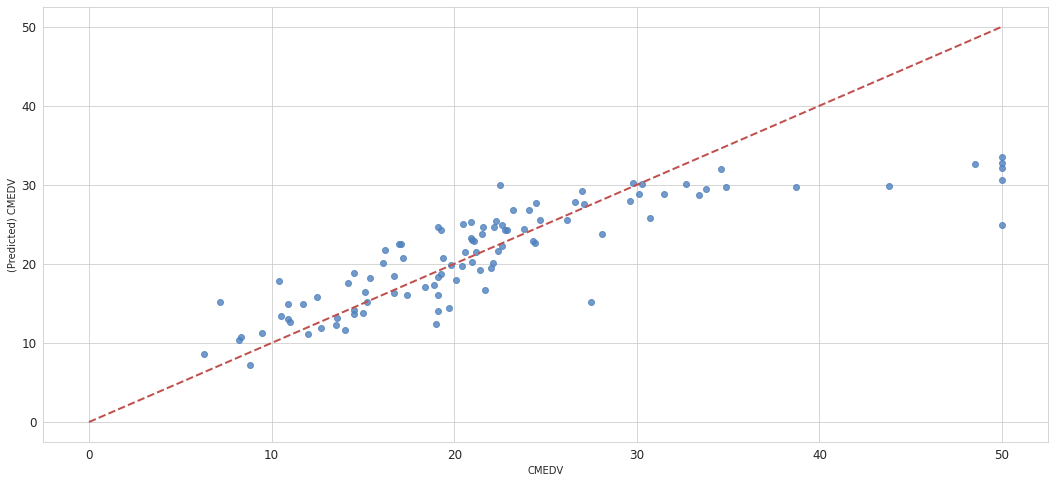

In [50]:
# 描画設定
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12       # x軸のラベルのフォントサイズ
rcParams['ytick.labelsize'] = 12       # y軸のラベルのフォントサイズ
rcParams['figure.figsize'] = 18,8      # 画像サイズの変更(inch)

import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
sns.set_color_codes()                  # デフォルトカラー設定 (deepになってる)

plt.figure()
ax = sns.regplot(x=Y_test, y=model.predict(X_test), fit_reg=False,color='#4F81BD')
ax.set_xlabel(u"CMEDV")
ax.set_ylabel(u"(Predicted) CMEDV")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.plot([0,10,20,30,40,50],[0,10,20,30,40,50], linewidth=2, color="#C0504D",ls="--")


#**Neural Network**

In [51]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep="\t")
list(df.columns)


['OBS.',
 'TOWN',
 'TOWN#',
 'TRACT',
 'LON',
 'LAT',
 'MEDV',
 'CMEDV',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [52]:
# 訓練データとテストデータに分割する。
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=100)

# 変数の組み合わせは前回の重回帰分析と同じ
X_train = train[["RM","LSTAT","PTRATIO","B"]]
Y_train = train["CMEDV"]
X_test = test[["RM","LSTAT","PTRATIO","B"]]
Y_test = test["CMEDV"]

#正規化する
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#モデル作成
import numpy as np
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50)) 
model.fit(X_train,Y_train) 


# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

get_model_evaluations(X_train,Y_train,X_test,Y_test,model)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


('adjusted_r2(train)     :0.6030119536130091',
 'adjusted_r2(test)      :0.6610392268551556',
 '平均誤差率(test)       :0.2732164310538813',
 'MAE(test)              :3.771708862088451',
 'MedianAE(test)         :2.489595732659075',
 'RMSE(test)             :5.604528828962777',
 'RMSE(test) / MAE(test) :1.485938876485675')

#**重回帰分析**



In [53]:
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston_corrected.txt",skiprows=9,sep="\t")
pd.DataFrame(df.columns)

,0
0,OBS.
1,TOWN
2,TOWN#
3,TRACT
4,LON
5,LAT
6,MEDV
7,CMEDV
8,CRIM
9,ZN


In [56]:
#頭の3行を表示
df.head(3)

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [59]:
# 訓練データとテストデータに分割する。
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=100)

# 訓練データの件数確認
print("train: "+str(train.count()["OBS."]))

# テストデータの件数確認
print("test: "+str(test.count()["OBS."]))


# 分析に利用する変数に限定
# 本当だったら事前に変数選択で利用するカラムを限定しておく

anacols=[
  "CRIM"  # 1人当たりの犯罪数
, "ZN" #町別の25,000平方フィート(7600m2)以上の住居区画の割合
, "INDUS" #町別の非小売業が占める土地面積の割合
, "CHAS" #チャールズ川沿いかどうか
, "NOX" #町別の窒素酸化物の濃度
, "RM" #住居の平均部屋数
, "AGE" #持ち家住宅
, "DIS" #5つのボストン雇用センターへの重み付き距離
, "RAD" #町別の環状高速道路へのアクセスのしやすさ
, "TAX" #町別の$10,000ドルあたりの固定資産税率
, "PTRATIO" #町別の生徒と先生の比率
, "B" #1000*(黒人人口割合 - 0.63)2
, "LSTAT" #貧困人口割合
]

# 訓練データ
X_train = train[anacols]  # 説明変数
Y_train=train["CMEDV"] # 目的変数

# テストデータ
X_test = test[anacols] # 説明変数
Y_test=test["CMEDV"] # 目的変数

# 欠損処理
# nullがあれば0埋めする。平均値や最頻値でもいい
X_train = X_train.fillna(0)
Y_train = Y_train.fillna(0)
X_test = X_test.fillna(0)
Y_test = Y_test.fillna(0)

train: 404
test: 102


In [60]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
311,0.79041,0.0,9.90,0,0.5440,6.122,52.8,2.6403,4,304,18.4,396.90,5.98
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59
244,0.20608,22.0,5.86,0,0.4310,5.593,76.5,7.9549,7,330,19.1,372.49,12.50
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
359,4.26131,0.0,18.10,0,0.7700,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
323,0.28392,0.0,7.38,0,0.4930,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76


In [61]:
Y_train

379    10.2
311    22.1
157    41.3
244    17.6
56     24.7
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: CMEDV, Length: 404, dtype: float64

In [63]:
#精度が一番良いモデルの探索

import sys
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

comblist=[]
best_model=None
best_features=None
best_mae=sys.maxsize

# 変数の選択数 (1 ~ 最大選択可能数)
for i in range(1,len(anacols) + 1):

  # 変数の選択数に合わせた組み合わせを作成
  comblist = list(itertools.combinations(anacols,i))
  for featurecomb in comblist:
    # 重回帰モデル作成
    multi_regression = LinearRegression()
    multi_regression.fit(X_train[list(featurecomb)],Y_train)

    # テストデータに当てはめる
    yhat_test = multi_regression.predict(X_test[list(featurecomb)])

    # 精度(MAE) 他にも様々な評価方法がある
    mae = mean_absolute_error(Y_test, yhat_test)
    
    #一番よい精度のモデルを探索
    if  mae < best_mae:
      best_mae = mae
      best_features = featurecomb
      best_model = multi_regression

print(str(best_mae))
print(best_features)

# 係数逆転現象の確認
pd.DataFrame({"name":X_train[list(best_features)].columns,"coefficients":best_model.coef_})

3.1841915998253896
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


,name,coefficients
0,CRIM,-0.087462
1,ZN,0.050444
2,NOX,-15.698495
3,RM,3.656426
4,DIS,-1.530007
5,RAD,0.312503
6,TAX,-0.013988
7,PTRATIO,-0.936410
8,B,0.009886
9,LSTAT,-0.504771


In [64]:
# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
   from sklearn.metrics import r2_score
   import numpy as np
   r_squared = r2_score(Y, model.predict(X))
   adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
   return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
   from sklearn.metrics import explained_variance_score
   from sklearn.metrics import mean_absolute_error
   from sklearn.metrics import mean_squared_error
   from sklearn.metrics import mean_squared_log_error
   from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
   yhat_test = model.predict(X_test)
   return  "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

get_model_evaluations(X_train[list(best_features)],Y_train,X_test[list(best_features)],Y_test,best_model)


('adjusted_r2(train)     :0.7224056607466813',
 'adjusted_r2(test)      :0.7386023143239528',
 '平均誤差率(test)       :0.15322170833625723',
 'MAE(test)              :3.1841915998253896',
 'MedianAE(test)         :2.501378017150664',
 'RMSE(test)             :4.7670541453730815',
 'RMSE(test) / MAE(test) :1.4971002830465638')